In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('heart.csv')

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [36]:
df[num_var].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


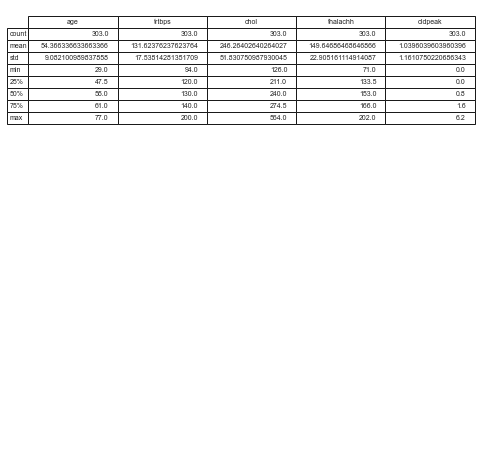

In [41]:
from pandas.plotting import table
desc = df[num_var].describe()

    #create a subplot without frame
plot = plt.subplot(111, frame_on=False)

    #remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 


    # create the table plot and position it in the upper left corner
table(plot, desc,loc='upper right')

    #save the plot as a png file
plt.savefig('desc_plot.png')

#### Checking for duplicated rows

In [9]:
duplicated_data = df.duplicated()
print(duplicated_data.sum())
df[duplicated_data]

1


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


#### Checking the number of unique values in the dataset to determine the categorical and numerical column 

In [10]:
unique_values = []
for i in df.columns:
    unique_count = df[i].value_counts().count()
    unique_values.append([unique_count])
pd.DataFrame( unique_values,   index= df.columns, columns= ['Unique value count'] )



,Unique value count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [18]:
df.sex.unique()

array([1, 0], dtype=int64)

In [11]:
#the categorical variables are the indexs with fewer count values 
cat_var = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
num_var = ['age', 'trtbps', 'chol', 'thalachh','oldpeak']

# Univariate Analysis

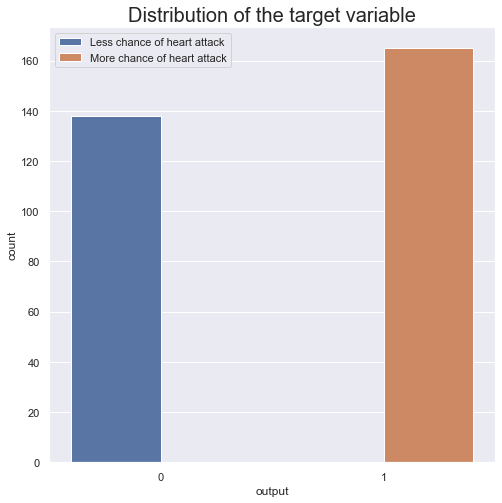

In [29]:
sns.set(rc={"figure.figsize":(8,8)})
sns.countplot(x ='output', data = df,hue="output")
plt.title("Distribution of the target variable", fontsize = 20)
plt.legend(labels = ['Less chance of heart attack','More chance of heart attack'])
plt.show()

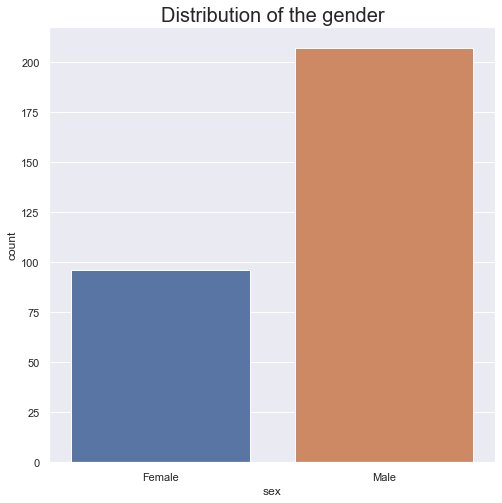

In [31]:
sns.set(rc={"figure.figsize":(8,8)})
sns.countplot(x ='sex', data = df)
plt.xticks([0,1],['Female','Male'])
plt.title("Distribution of the gender", fontsize = 20)

plt.show()

In [48]:
df[['sex','output']].groupby(['output']).sum()

,sex
output,
0,114
1,93


C:\Users\T430\anaconda3\envs\strive\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


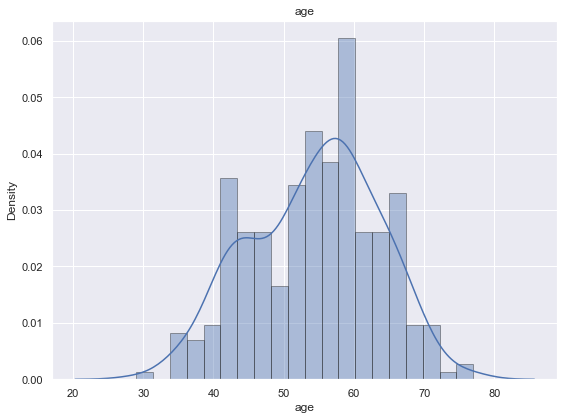

C:\Users\T430\anaconda3\envs\strive\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


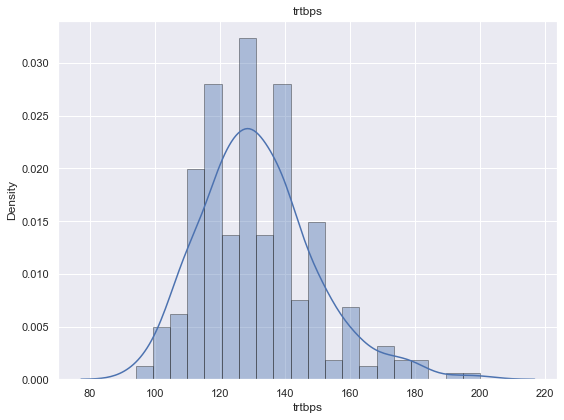

C:\Users\T430\anaconda3\envs\strive\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


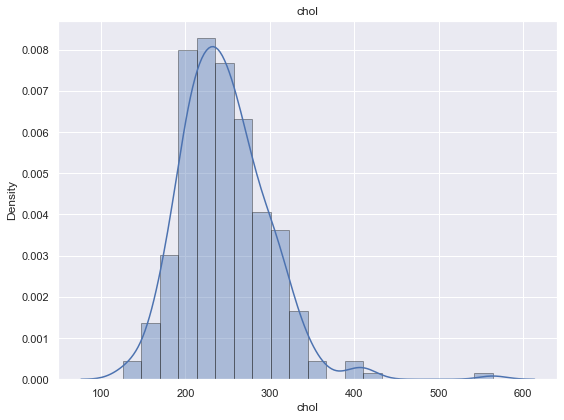

C:\Users\T430\anaconda3\envs\strive\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


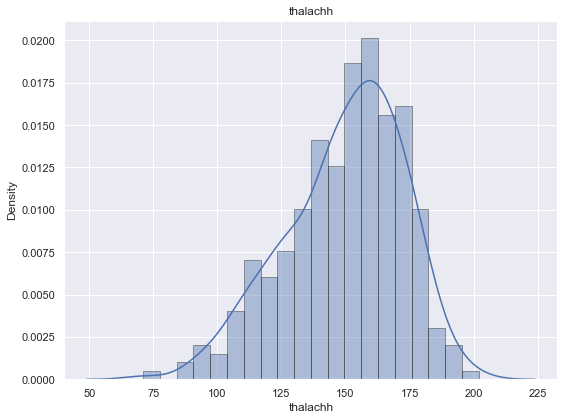

C:\Users\T430\anaconda3\envs\strive\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


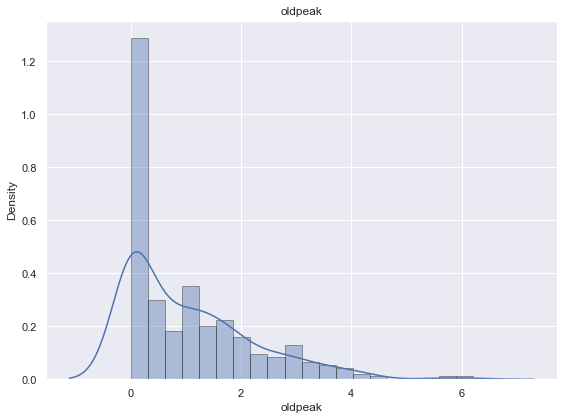

In [13]:
for i in num_var:
    plt.figure(figsize = (8, 6))
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.title(i)
    plt.xlabel(i)

    
    plt.tight_layout()
    plt.show()

# Bivariate Analysis

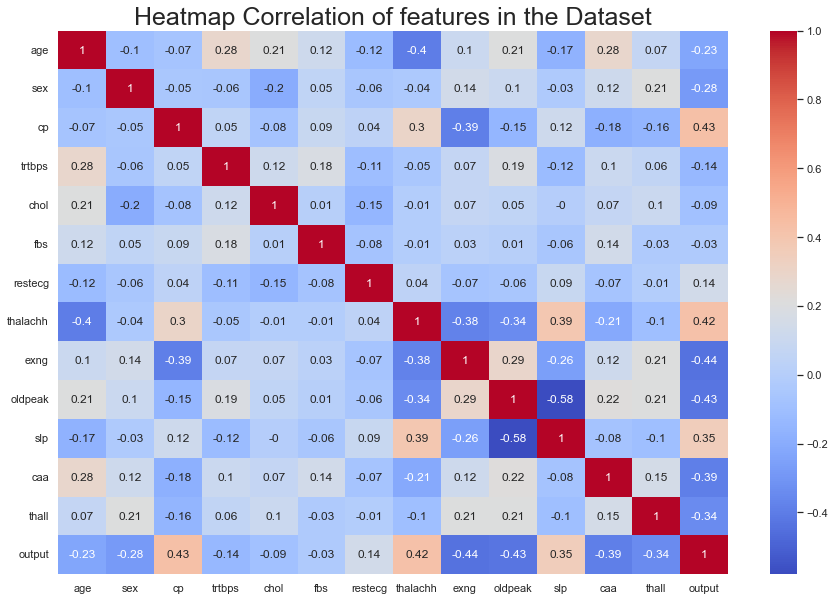

In [14]:
matrix = df.corr().round(2)
sns.set(rc={"figure.figsize":(15,10)})
sns.heatmap(matrix, annot=True,cmap="coolwarm")
plt.title("Heatmap Correlation of features in the Dataset", fontsize = 25)
plt.show()


Text(0, 0.5, 'Features')

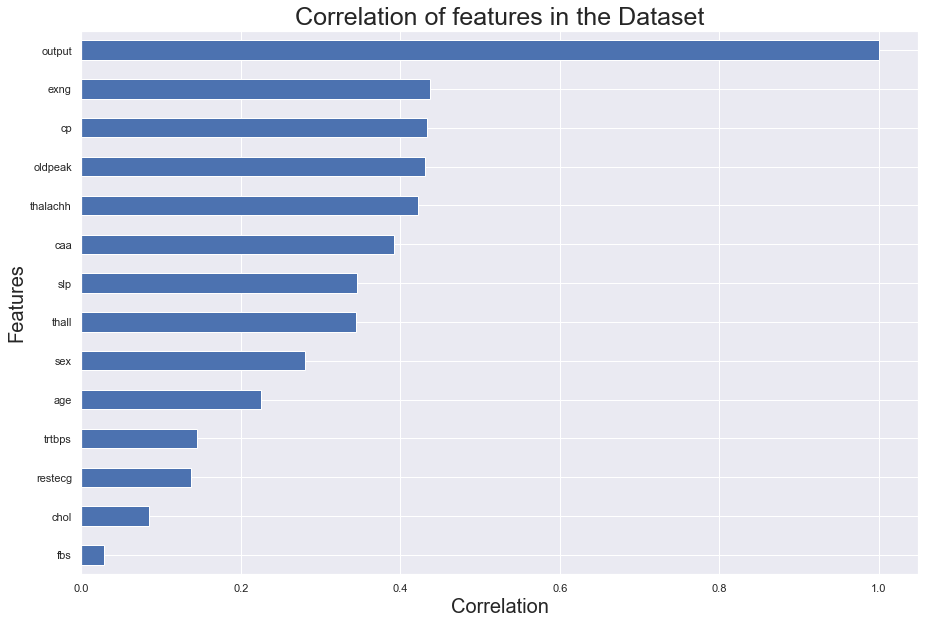

In [15]:
df.corr()['output'].abs().sort_values().plot.barh()
plt.title("Correlation of features in the Dataset", fontsize = 25)
plt.xlabel("Correlation", fontsize = 20)
plt.ylabel("Features", fontsize = 20)
